In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy
import scipy.stats as st
from scipy.stats import norm

In [4]:
wine_data_labels = ["Class Identifier", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                                                      "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
used_data_labels = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                                                      "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

wine_data = pd.read_csv("wine.data", delimiter=",", names=wine_data_labels)
wine = pd.DataFrame(wine_data)
wine.head()
wine.describe()


,Class Identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

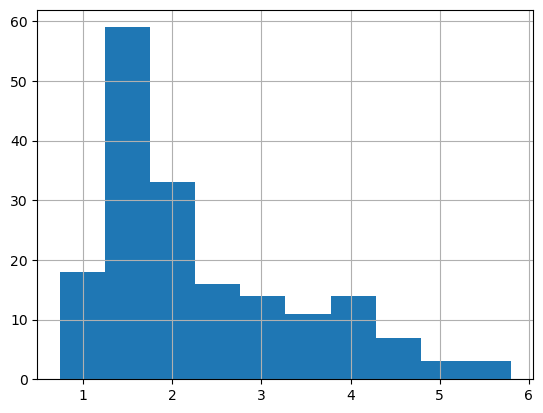

In [5]:
wine["Malic acid"].hist()

In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(
    wine[used_data_labels].values, wine["Class Identifier"].values
)
print('Score: ', gnb.score(
    wine[used_data_labels].values,
    wine["Class Identifier"].values
))

Score:  0.9887640449438202


In [7]:
import itertools
def findsubsets(S,n):
    return set(itertools.combinations(S,n))

subset_length = 13
results = []
for cols in findsubsets(wine.columns[1:].values, subset_length):
    gnb = GaussianNB()

    x = wine[list(cols)].values
    y = wine["Class Identifier"].values

    gnb.fit(x, y)
    score = gnb.score(x,y)

    results.append(list(cols) + [score])
    
columns = [('column_%i' % i) for i in range(subset_length)] + ['score']
pd.DataFrame(results, columns=columns)




,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,score
0,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,0.988764


In [15]:
subset_length = 12
results = []

for cols in findsubsets(wine.columns[1:].values, subset_length):
    gnb = GaussianNB()

    x = wine[list(cols)].values
    y = wine["Class Identifier"].values

    gnb.fit(x, y)
    score = gnb.score(x,y)

    results.append(list(cols) + [score])
    
columns = [('column_%i' % i) for i in range(subset_length)] + ['score']
pd.DataFrame(results, columns=columns)

    



,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,score
0,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,0.977528
1,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,0.971910
2,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,0.983146
3,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Proline,0.977528
4,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,OD280/OD315 of diluted wines,Proline,0.971910
5,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Hue,OD280/OD315 of diluted wines,Proline,0.977528
6,Alcohol,Malic acid,Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,0.977528
7,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,0.971910
8,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,0.966292
9,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,0.983146


In [26]:
subset_length = 10
results = []

for cols in findsubsets(wine.columns[1:].values, subset_length):
    gnb = GaussianNB()

    x = wine[list(cols)].values
    y = wine["Class Identifier"].values

    gnb.fit(x, y)
    score = gnb.score(x,y)

    results.append(list(cols) + [score])
    
columns = [('column_%i' % i) for i in range(subset_length)] + ['score']
dataset = pd.DataFrame(results, columns=columns)
dataset.sort_values(by=['score'])

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,score
202,Malic acid,Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,0.898876
28,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Hue,OD280/OD315 of diluted wines,0.921348
47,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,OD280/OD315 of diluted wines,0.921348
40,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,0.926966
89,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,0.932584
...,...,...,...,...,...,...,...,...,...,...,...
208,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline,0.988764
35,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Proline,0.988764
273,Alcohol,Ash,Alcalinity of ash,Magnesium,Flavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,0.994382
161,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Proanthocyanins,Color intensity,Hue,Proline,0.994382
